In [ ]:
#import library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load train file csv
train = pd.read_csv('/content/drive/MyDrive/Project Siscer/train-salin.csv')
train.head()

,Image,Class
0,1.jpg,mentah
1,2.jpg,mentah
2,3.jpg,mentah
3,4.jpg,mentah
4,5.jpg,mentah


In [ ]:
#defined df variable
df = train

In [ ]:
#define train dataset path
TRAIN_PATH = '/content/drive/MyDrive/Project Siscer/Dataset/train'

In [ ]:
def get_model(IMG_SIZE):
    model = tf.keras.models.Sequential([
        # Model layers
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    model.summary()

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
# Storing the average of all predictions
main_pred = []
error = []
data_kfold = pd.DataFrame()

In [ ]:
# Creating X, Y for training
train_y = df.Class
train_x = df.drop(['Class'],axis=1)

In [ ]:
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 100
N_SPLIT = 5

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

Found 416 validated image filenames belonging to 4 classes.
Found 104 validated image filenames belonging to 4 classes.
Epoch 1/100
4/4 [==============================] - 68s 17s/step - loss: 1.4787 - accuracy: 0.2062 - val_loss: 1.3826 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 17s 4s/step - loss: 1.3815 - accuracy: 0.2937 - val_loss: 1.3856 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 11s 2s/step - loss: 1.3782 - accuracy: 0.2812 - val_loss: 1.3819 - val_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 10s 2s/step - loss: 1.3781 - accuracy: 0.2562 - val_loss: 1.3556 - val_accuracy: 0.4808
Epoch 5/100
4/4 [==============================] - 9s 2s/step - loss: 1.3613 - accuracy: 0.3375 - val_loss: 1.3403 - val_accuracy: 0.3558
Epoch 6/100
4/4 [==============================] - 6s 1s/step - loss: 1.3315 - accuracy: 0.4875 - val_loss: 1.2278 - val_accuracy: 0.6154
Epoch 7/100
4/4 [==============================

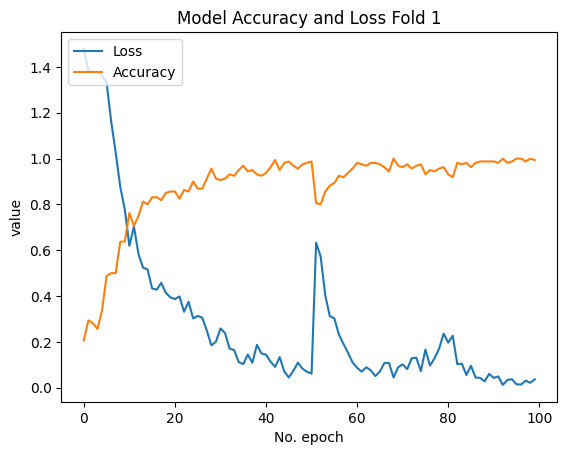

4/4 [==============================] - 1s 213ms/step


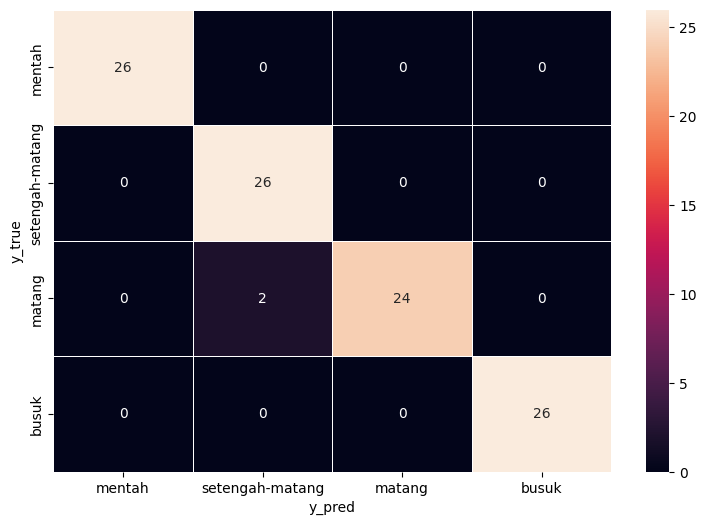

Score for fold 1: loss of 0.16253536939620972; accuracy of 98.07692170143127%
Found 416 validated image filenames belonging to 4 classes.
Found 104 validated image filenames belonging to 4 classes.
Epoch 1/100
4/4 [==============================] - 8s 2s/step - loss: 1.4610 - accuracy: 0.2562 - val_loss: 1.3738 - val_accuracy: 0.3558
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 1.3738 - accuracy: 0.3187 - val_loss: 1.3543 - val_accuracy: 0.5962
Epoch 3/100
4/4 [==============================] - 8s 2s/step - loss: 1.3411 - accuracy: 0.3688 - val_loss: 1.2848 - val_accuracy: 0.5192
Epoch 4/100
4/4 [==============================] - 7s 2s/step - loss: 1.2028 - accuracy: 0.5000 - val_loss: 1.1225 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 8s 2s/step - loss: 1.0464 - accuracy: 0.5562 - val_loss: 1.1477 - val_accuracy: 0.4327
Epoch 6/100
4/4 [==============================] - 6s 1s/step - loss: 1.1611 - accuracy: 0.4000 - val_loss: 1.08

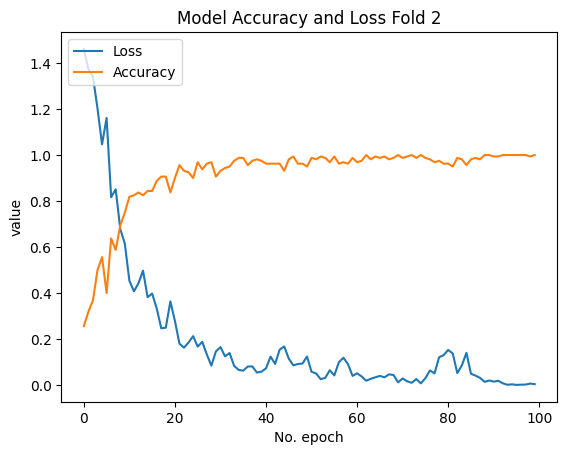

4/4 [==============================] - 1s 218ms/step


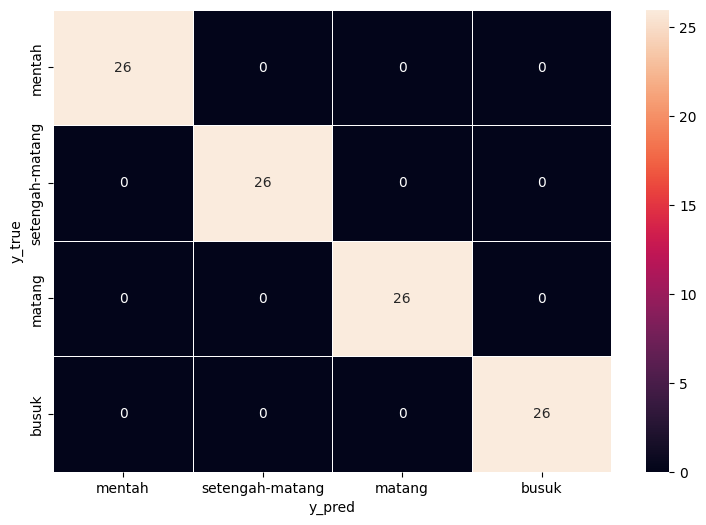

Score for fold 2: loss of 0.008140583522617817; accuracy of 100.0%
Found 416 validated image filenames belonging to 4 classes.
Found 104 validated image filenames belonging to 4 classes.
Epoch 1/100
4/4 [==============================] - 9s 2s/step - loss: 1.4122 - accuracy: 0.2375 - val_loss: 1.3797 - val_accuracy: 0.2596
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 1.3805 - accuracy: 0.2625 - val_loss: 1.3684 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 9s 2s/step - loss: 1.3567 - accuracy: 0.3688 - val_loss: 1.3191 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 1.2790 - accuracy: 0.3938 - val_loss: 1.2634 - val_accuracy: 0.3365
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 1.1752 - accuracy: 0.4437 - val_loss: 0.9985 - val_accuracy: 0.6250
Epoch 6/100
4/4 [==============================] - 8s 2s/step - loss: 0.9323 - accuracy: 0.6125 - val_loss: 0.8693 - val_ac

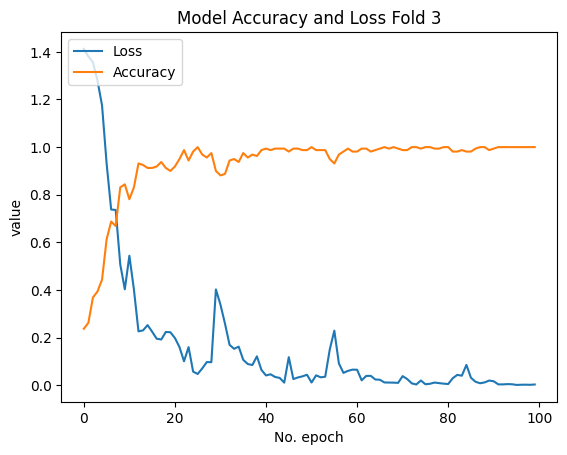

4/4 [==============================] - 1s 216ms/step


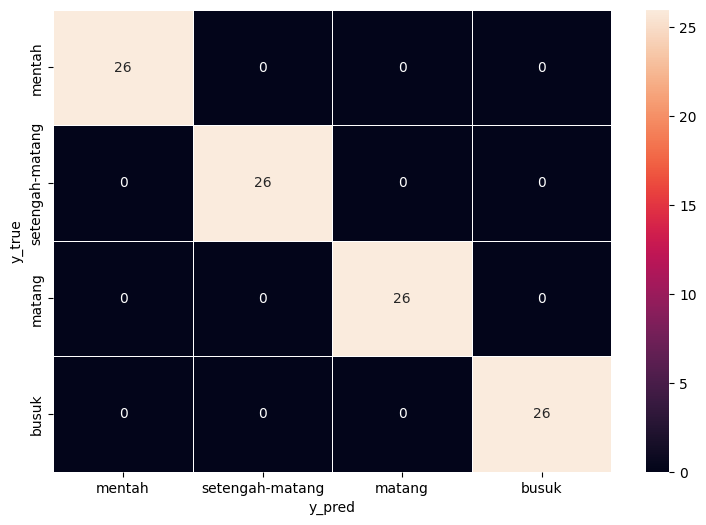

Score for fold 3: loss of 0.0010860570473596454; accuracy of 100.0%
Found 416 validated image filenames belonging to 4 classes.
Found 104 validated image filenames belonging to 4 classes.
Epoch 1/100
4/4 [==============================] - 9s 2s/step - loss: 1.4057 - accuracy: 0.2438 - val_loss: 1.3787 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 1.3792 - accuracy: 0.2750 - val_loss: 1.3588 - val_accuracy: 0.3942
Epoch 3/100
4/4 [==============================] - 8s 2s/step - loss: 1.3491 - accuracy: 0.4812 - val_loss: 1.2992 - val_accuracy: 0.6635
Epoch 4/100
4/4 [==============================] - 8s 2s/step - loss: 1.2355 - accuracy: 0.5125 - val_loss: 1.1045 - val_accuracy: 0.6827
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 1.0634 - accuracy: 0.5875 - val_loss: 0.8098 - val_accuracy: 0.6635
Epoch 6/100
4/4 [==============================] - 8s 2s/step - loss: 0.8996 - accuracy: 0.6125 - val_loss: 0.6628 - val_a

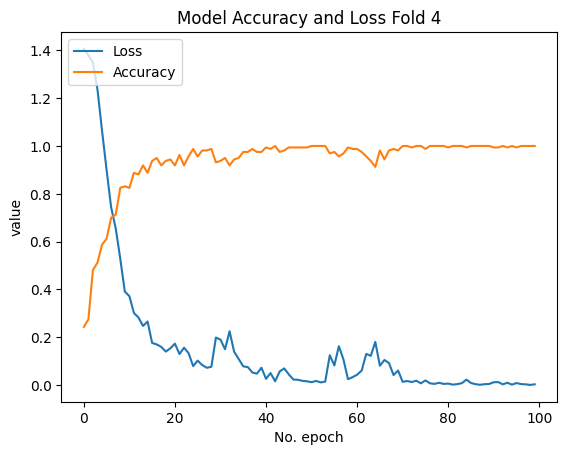

4/4 [==============================] - 1s 218ms/step


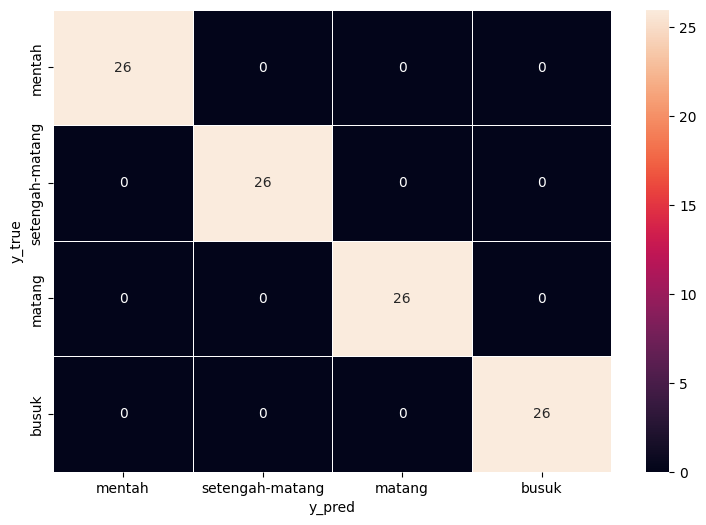

Score for fold 4: loss of 0.0006329502211883664; accuracy of 100.0%
Found 416 validated image filenames belonging to 4 classes.
Found 104 validated image filenames belonging to 4 classes.
Epoch 1/100
4/4 [==============================] - 11s 2s/step - loss: 1.4122 - accuracy: 0.2438 - val_loss: 1.4086 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 1.3996 - accuracy: 0.2625 - val_loss: 1.3844 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 6s 1s/step - loss: 1.3649 - accuracy: 0.3187 - val_loss: 1.3739 - val_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 8s 2s/step - loss: 1.3724 - accuracy: 0.3125 - val_loss: 1.3535 - val_accuracy: 0.2500
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 1.3376 - accuracy: 0.2875 - val_loss: 1.2915 - val_accuracy: 0.4712
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 1.2785 - accuracy: 0.4938 - val_loss: 1.1371 - val_

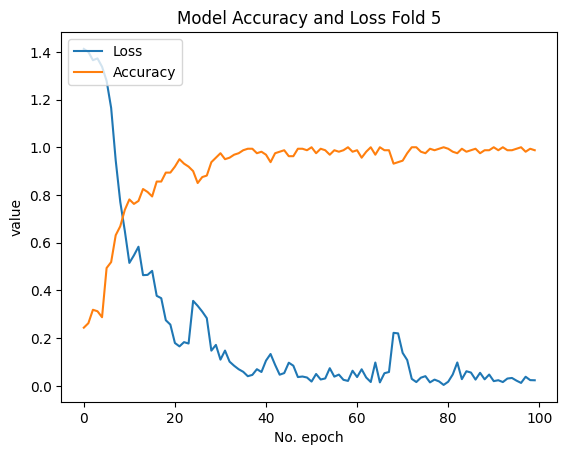

4/4 [==============================] - 2s 354ms/step


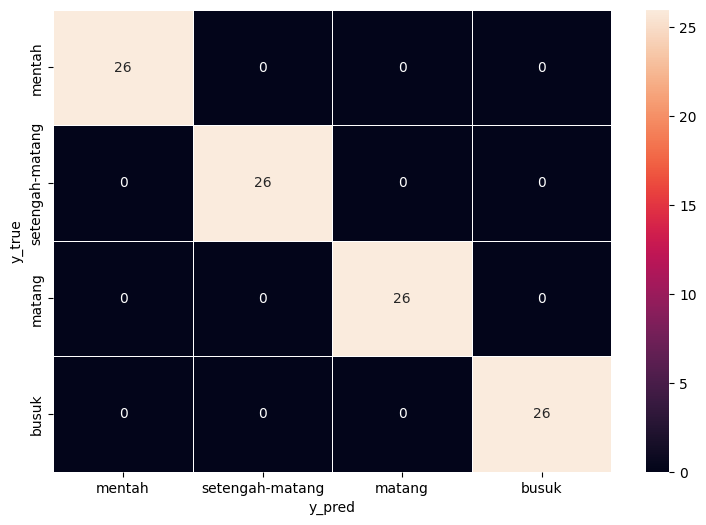

Score for fold 5: loss of 0.0008991683716885746; accuracy of 100.0%


In [ ]:
#Initializing Data Generators
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

# k-fold
kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

# Variable for keeping count of split we are executing
j = 0

# K-fold Train and test for each split
for train_idx, val_idx in list(kfold.split(train_x,train_y)):
    x_train_df = df.iloc[train_idx]
    x_valid_df = df.iloc[val_idx]
    j+=1


    training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, directory=TRAIN_PATH,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

    validation_set = validation_datagen.flow_from_dataframe(dataframe=x_valid_df, directory=TRAIN_PATH,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 shuffle=False,
                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

    model = get_model(IMG_SIZE)


    history = model.fit(training_set,
                        validation_data=validation_set,
                        epochs = EPOCHS,
                        steps_per_epoch=x_train_df.shape[0] // 3 / BATCH_SIZE
                        )

    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title(f'Model Accuracy and Loss Fold {j}')
    plt.ylabel('value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()

    scores = model.evaluate(validation_set, verbose=0)

    pred = model.predict(validation_set)
    y_pred = np.argmax(pred, axis=1)

    cf_matrix = confusion_matrix(validation_set.classes, y_pred)
    import seaborn as sns
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(cf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.xaxis.set_ticklabels(['mentah', 'setengah-matang','matang','busuk'])
    ax.yaxis.set_ticklabels(['mentah', 'setengah-matang','matang','busuk'])
    plt.show()

    model.save(f'/content/drive/MyDrive/Project Siscer/model/model{j}.h5')
    print(f'Score for fold {j}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} ')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.16253536939620972 - Accuracy: 98.07692170143127%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.008140583522617817 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.0010860570473596454 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.0006329502211883664 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.0008991683716885746 - Accuracy: 100.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 99.61538434028625 
> Loss: 0.03465882571181282
------------------------------------------------------------------------


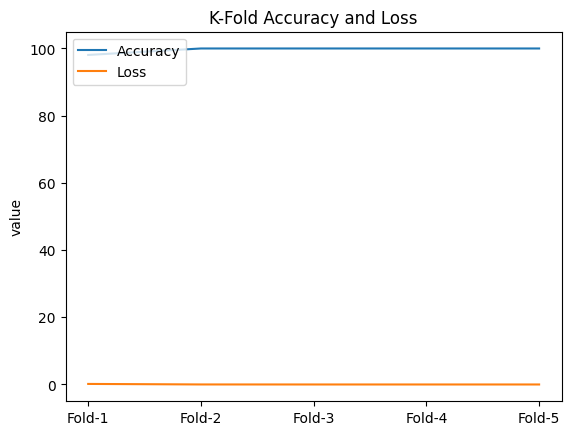

In [ ]:
#ploting k-fold accuracy and loss
from matplotlib import style

plt.plot(acc_per_fold, label='Accuracy')
plt.plot(loss_per_fold, label='Loss')
plt.title('K-Fold Accuracy and Loss')
plt.ylabel('value')
x = ["Fold-1", "Fold-2", "Fold-3", "Fold-4", "Fold-5"]

default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.legend(loc="upper left")
plt.style.use('ggplot')
plt.show()


Found 104 images belonging to 4 classes.
4/4 [==============================] - 12s 3s/step
Accuracy Testing :  1.0
Precision Testing :  1.0
Recall Testing :  1.0
F1 Score Testing :  1.0


Confusion Matrix
[[26  0  0  0]
 [ 0 26  0  0]
 [ 0  0 26  0]
 [ 0  0  0 26]]


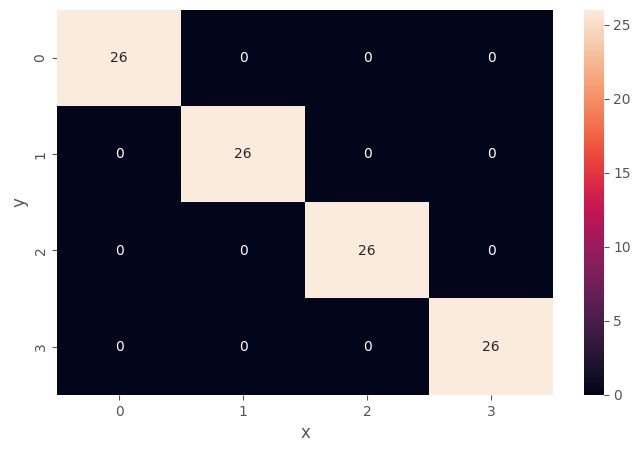

                 precision    recall  f1-score   support

         mentah       1.00      1.00      1.00        26
setengah-matang       1.00      1.00      1.00        26
         matang       1.00      1.00      1.00        26
          busuk       1.00      1.00      1.00        26

       accuracy                           1.00       104
      macro avg       1.00      1.00      1.00       104
   weighted avg       1.00      1.00      1.00       104

Accuracy on test data: 1.0000 
Loss on test data: 0.0016 



In [24]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Define Path
model_path = '/content/drive/MyDrive/Project Siscer/model/model5.h5'

#Load the pre-trained models
model = load_model(model_path)

test_data_dir = '/content/drive/MyDrive/Project Siscer/Dataset/test/'

datagen = ImageDataGenerator(rescale=1./255)

test_data_generator = datagen.flow_from_directory(test_data_dir,target_size=(150,150),batch_size=32,
                                                           class_mode="categorical", shuffle=False)
test_predictions = np.argmax(model.predict(test_data_generator), axis=-1)
test_labels = test_data_generator.classes

acc_test = accuracy_score(test_predictions, test_labels)
prec_test = precision_score(test_predictions, test_labels, average = 'weighted')
rec_test = recall_score(test_predictions, test_labels, average = 'weighted')
f1score_test = f1_score(test_predictions, test_labels, average = 'weighted')

print("Accuracy Testing : ",acc_test)
print("Precision Testing : ",prec_test)
print("Recall Testing : ",rec_test)
print("F1 Score Testing : ",f1score_test)

# Create confusion matrix
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_predictions))

f, axis = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_labels, test_predictions), annot=True, fmt=".0f", ax=axis)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

target_names =  ['mentah', 'setengah-matang','matang', 'busuk']
print(classification_report(test_labels, test_predictions, target_names=target_names))

loss, acc = model.evaluate(test_data_generator,steps=len(test_data_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')